Plot parameter results from fitting $y=e^{bx+d}$

High b -> high growth rate

Low d/b -> long delay

For each admixture, plots scatter plots of:
- b vs d/b
- b vs max time
- d/b vs max time
- b vs max size
- d/b vs max size

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns

In [29]:
plt.rcParams['figure.figsize'] = [5, 4]

In [30]:
def get_id_colors():
    df = pd.read_csv("../../data/id_colors.csv")
    df = df.drop("Group", axis=1)
    df = df.set_index("ID")
    return df.to_dict()["Color"]

In [31]:
data_file = "../../data/growth_data.csv"
exp_file = "../../results/growth_fit_results_4/exp_growth.csv"
save_path = "../../figures/growth_fit_results_4/"
early_harvest_id = [426, 429, 430, 434, 437, 442, 443, 451, 464, 471]
slow_growth_id = [428, 438]
id_colors=get_id_colors()

save = True

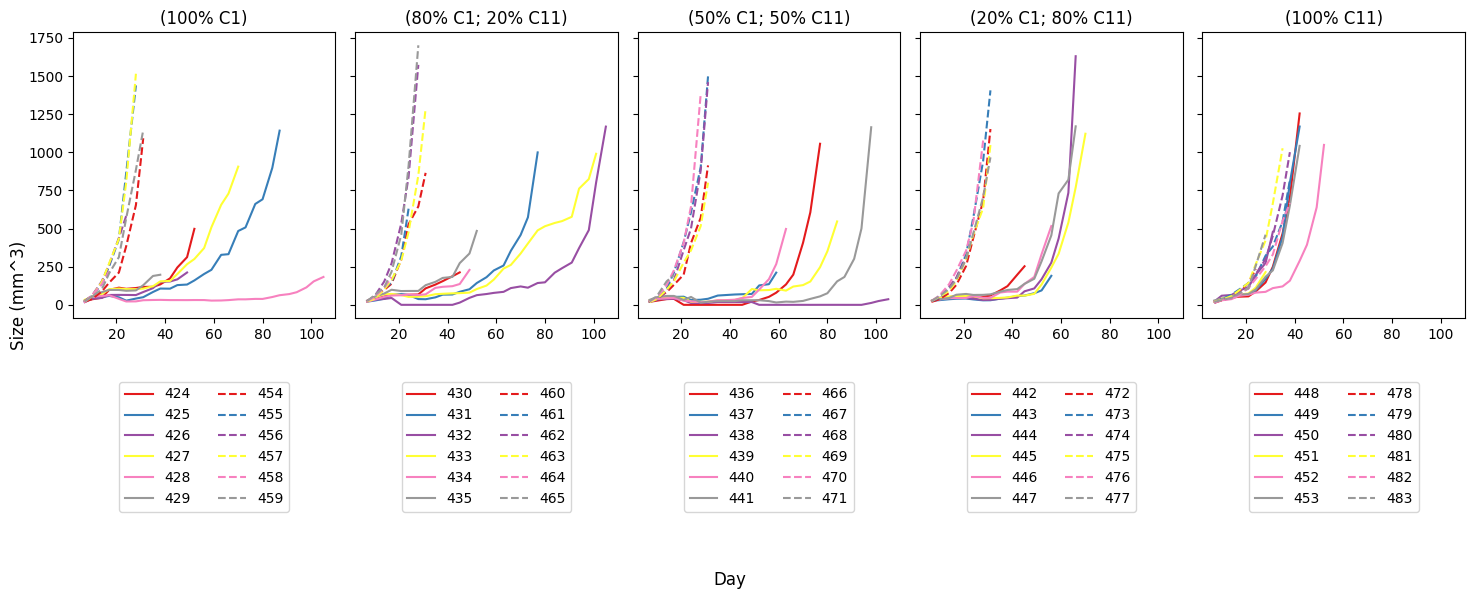

In [32]:
# Plot growth data for reference

df = pd.read_csv(data_file)
df = df.melt(id_vars=["Group", "ID"], var_name="Day", value_name="Size").reset_index()
df = df.dropna()
df["Day"] = df["Day"].astype(int)
exps = ["(100% C1)", "(80% C1; 20% C11)", "(50% C1; 50% C11)", "(20% C1; 80% C11)", "(100% C11)"]
days = df["Day"].unique().astype(int)
days.sort()
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(15, 6))
for i in range(len(exps)):
    exp = exps[i]
    exp_df = df[[exp in x for x in df["Group"]]]
    exp_b6 = exp_df[["A" in x for x in exp_df["Group"]]]
    exp_nude = exp_df[["nude" in x for x in exp_df["Group"]]]
    for mouse_id in exp_b6["ID"].unique():
        axes[i].plot(exp_b6[exp_b6["ID"] == mouse_id]["Day"].astype(int), exp_b6[exp_b6["ID"] == mouse_id]["Size"], 
                     color=id_colors[mouse_id], label=mouse_id)
    for mouse_id in exp_nude["ID"].unique():
        axes[i].plot(exp_nude[exp_nude["ID"] == mouse_id]["Day"].astype(int), exp_nude[exp_nude["ID"] == mouse_id]["Size"], 
                     color=id_colors[mouse_id], label=mouse_id, linestyle="dashed")
    axes[i].set_title(exp)
    axes[i].legend(loc="upper center", ncol=2, bbox_to_anchor=(0.5, -0.2))
fig.supxlabel("Day")
fig.supylabel("Size (mm^3)")
fig.tight_layout()
plt.savefig("../../figures/growth_data/all_colors.png")
plt.show()


In [33]:
# Prep the data frame

exp_df = pd.read_csv(exp_file)
exp_df["last_day"] = exp_df["last_day"].astype(int)
exp_df["d/b"] = exp_df["d"]/exp_df["b"]
exp_df = exp_df.sort_values("id")

data_df = pd.read_csv(data_file)
data_df = data_df.melt(id_vars=["Group", "ID"], var_name="Time")
data_df = data_df.dropna()
data_df["Time"] = data_df["Time"].astype(int)
data_df["marker"] = ["x" if row["ID"] in early_harvest_id else "^" if row["ID"] in slow_growth_id else "o" for idx, row in data_df.iterrows()]

exp_df = pd.merge(left=exp_df, right=data_df[["ID", "Time", "value", "marker"]], left_on=["id", "last_day"], right_on=["ID", "Time"])
exp_df = exp_df.rename({"value": "max_size"}, axis=1)
# print(exp_df)

# print(id_colors)

In [34]:
exp_df[exp_df["marker"] == "o"]

,group,id,b,d,rscore,last_day,d/b,ID,Time,max_size,marker
0,Grp. A1 B6 (100% C1),424,0.065348,2.661706,0.904443,52,40.731325,424,52,498.264138,o
1,Grp. A1 B6 (100% C1),425,0.053068,2.378282,0.992446,87,44.816036,425,87,1142.278200,o
3,Grp. A1 B6 (100% C1),427,0.055895,2.899761,0.987059,70,51.879118,427,70,906.299904,o
7,Grp. A2 B6 (80% C1; 20% C11),431,0.083802,0.370541,0.969811,77,4.421643,431,77,999.548491,o
8,Grp. A2 B6 (80% C1; 20% C11),432,0.087246,-2.147689,0.970396,105,-24.616483,432,105,1168.641050,o
9,Grp. A2 B6 (80% C1; 20% C11),433,0.037505,3.088243,0.977266,101,82.343206,433,101,990.600000,o
11,Grp. A2 B6 (80% C1; 20% C11),435,0.060156,2.944987,0.948032,52,48.955690,435,52,484.620274,o
12,Grp. A3 B6 (50% C1; 50% C11),436,0.143616,-4.090419,0.996220,77,-28.481699,436,77,1056.203676,o
14,Grp. A3 B6 (50% C1; 50% C11),439,0.075556,-0.149340,0.912935,84,-1.976543,439,84,546.990696,o
15,Grp. A3 B6 (50% C1; 50% C11),440,0.144824,-2.928145,0.963475,63,-20.218691,440,63,497.509637,o


In [35]:
exp_df[exp_df["marker"]=="o"].groupby("group")[["b", "d/b"]].median()

,b,d/b
group,,
Grp. A1 B6 (100% C1),0.055895,44.816036
Grp. A2 B6 (80% C1; 20% C11),0.071979,26.688666
Grp. A3 B6 (50% C1; 50% C11),0.144220,-24.350195
Grp. A4 B6 (20% C1; 80% C11),0.107982,-1.684610
Grp. A5 B6 (100% C11),0.127967,11.605972
Grp. B1 nude (100% C1),0.157277,16.684894
Grp. B2 nude (80% C1; 20% C11),0.160964,17.747878
Grp. B3 nude (50% C1; 50% C11),0.139818,18.287749
Grp. B4 nude (20% C1; 80% C11),0.146780,18.473659


In [36]:

# Create one figure for each admixture with all the parameter combinations
# for exp in exp_df["group"].unique():
    # print(exp)
#     fig, axes = plt.subplots(2, 3, figsize=((14, 7)))
#     fig.suptitle(exp+"\ny=e^(bx+d)")
#     curr_data = exp_df[exp_df["group"] == exp].reset_index()
#     curr_reg_data = curr_data[(~curr_data["ID"].isin(slow_growth_id)) & (~curr_data["ID"].isin(early_harvest_id))]
#     colors = [id_colors[idx] for idx in curr_data["id"].unique()]

#     for i in range(len(curr_data)):
#         axes[0][0].scatter(x=curr_data.loc[i, "b"], y=curr_data.loc[i,"d/b"], color=colors[i], 
#                            label=curr_data.loc[i,"id"], marker=curr_data.loc[i,"marker"])
#     sns.regplot(data=curr_reg_data, x="b", y="d/b", scatter=False, ax=axes[0][0], ci=None)
#     axes[0][0].legend()
#     axes[0][0].set_title("d/b vs b")

#     for i in range(len(curr_data)):
#         axes[0][1].scatter(x=curr_data.loc[i, "last_day"], y=curr_data.loc[i,"b"], color=colors[i],
#                            label=curr_data.loc[i,"id"], marker=curr_data.loc[i,"marker"])
#     sns.regplot(data=curr_reg_data, x="last_day", y="b", scatter=False, ax=axes[0][1], ci=None)
#     axes[0][1].legend()
#     axes[0][1].set_title("b vs time")

#     for i in range(len(curr_data)):
#         axes[0][2].scatter(x=curr_data.loc[i, "last_day"], y=curr_data.loc[i,"d/b"], color=colors[i],
#                            label=curr_data.loc[i,"id"], marker=curr_data.loc[i,"marker"])
#     sns.regplot(data=curr_reg_data, x="last_day", y="d/b", scatter=False, ax=axes[0][2], ci=None)
#     axes[0][2].legend()
#     axes[0][2].set_title("d/b vs time")

#     for i in range(len(curr_data)):
#         axes[1][1].scatter(x=curr_data.loc[i, "max_size"], y=curr_data.loc[i,"b"], color=colors[i],
#                            label=curr_data.loc[i,"id"], marker=curr_data.loc[i,"marker"])
#     sns.regplot(data=curr_reg_data, x="max_size", y="b", scatter=False, ax=axes[1][1], ci=None)
#     axes[1][1].legend()
#     axes[1][1].set_title("b vs max size")

#     for i in range(len(curr_data)):
#         axes[1][2].scatter(x=curr_data.loc[i, "max_size"], y=curr_data.loc[i,"d/b"], color=colors[i],
#                            label=curr_data.loc[i,"id"], marker=curr_data.loc[i,"marker"])
#     sns.regplot(data=curr_reg_data, x="max_size", y="d/b", scatter=False, ax=axes[1][2], ci=None)
#     axes[1][2].legend()
#     axes[1][2].set_title("d/b vs max size")

#     axes[1][0].axis("off")

#     plt.tight_layout()
    # if save:
    #     plt.savefig(save_path+exp+"_var_scatters.png")
    # plt.show()


d/b vs b


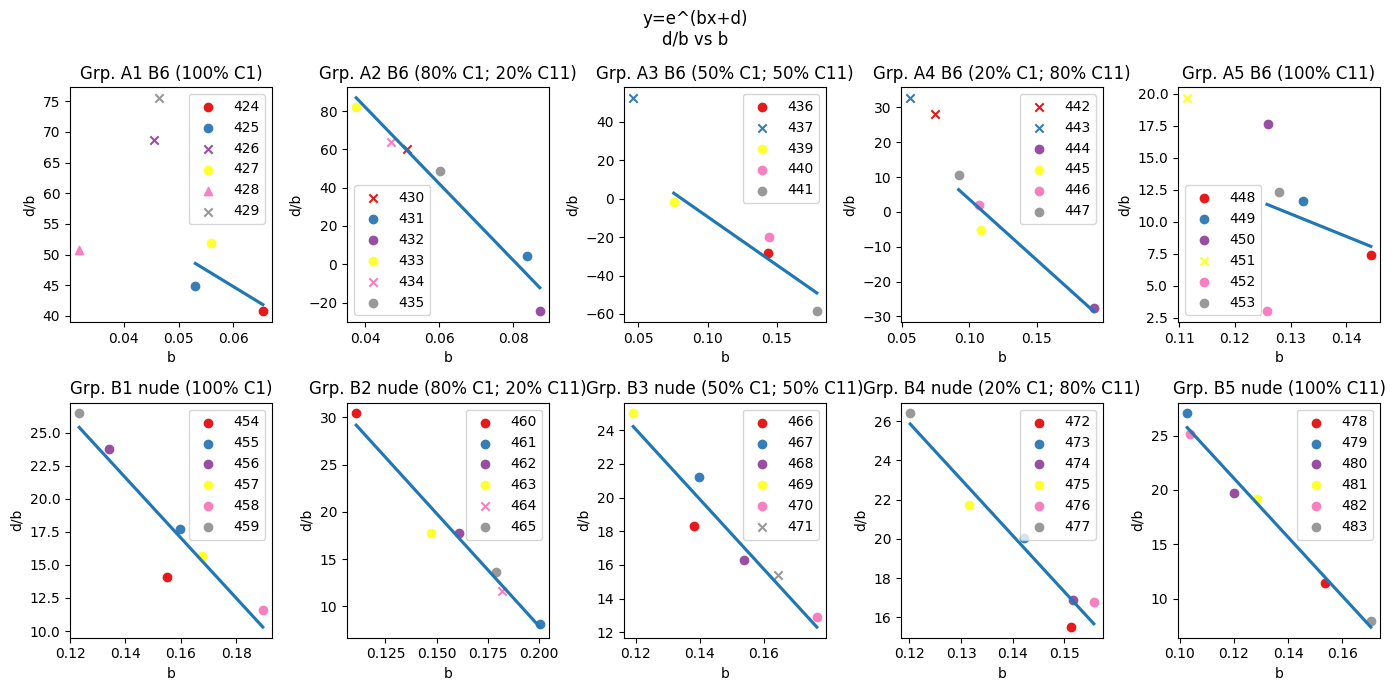

b vs time


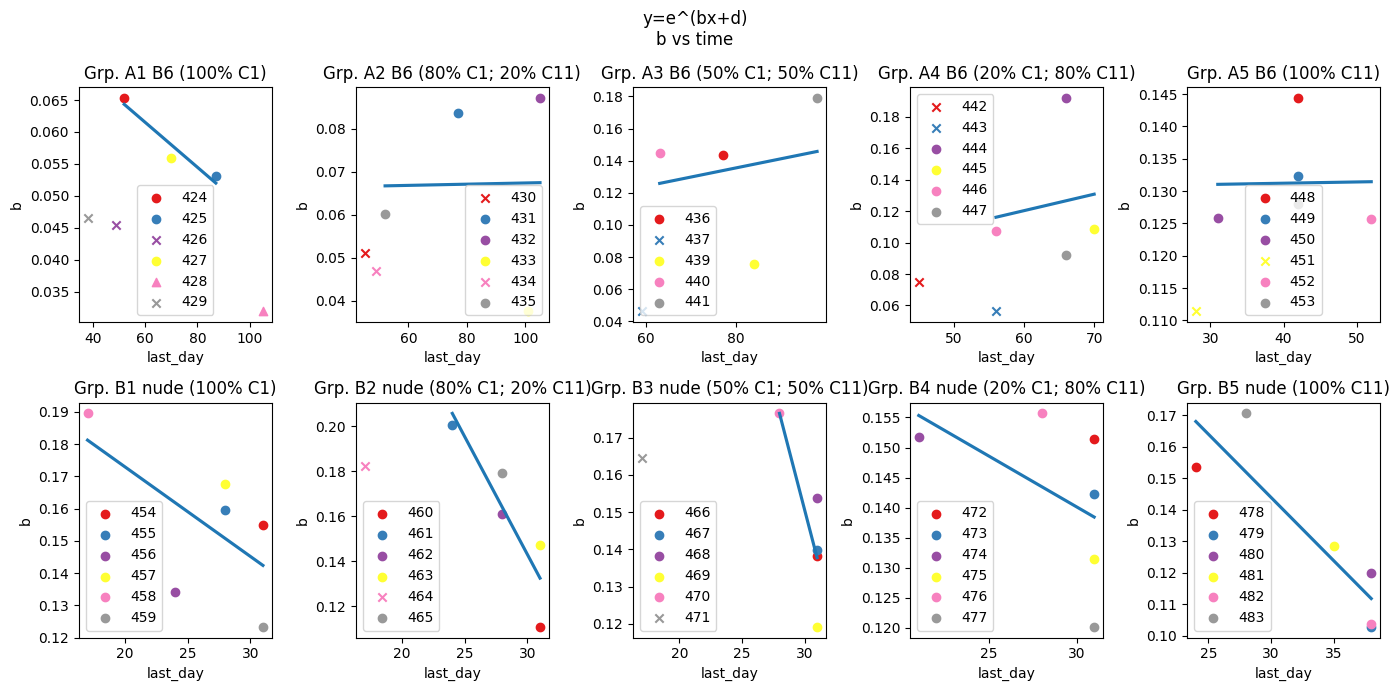

d/b vs time


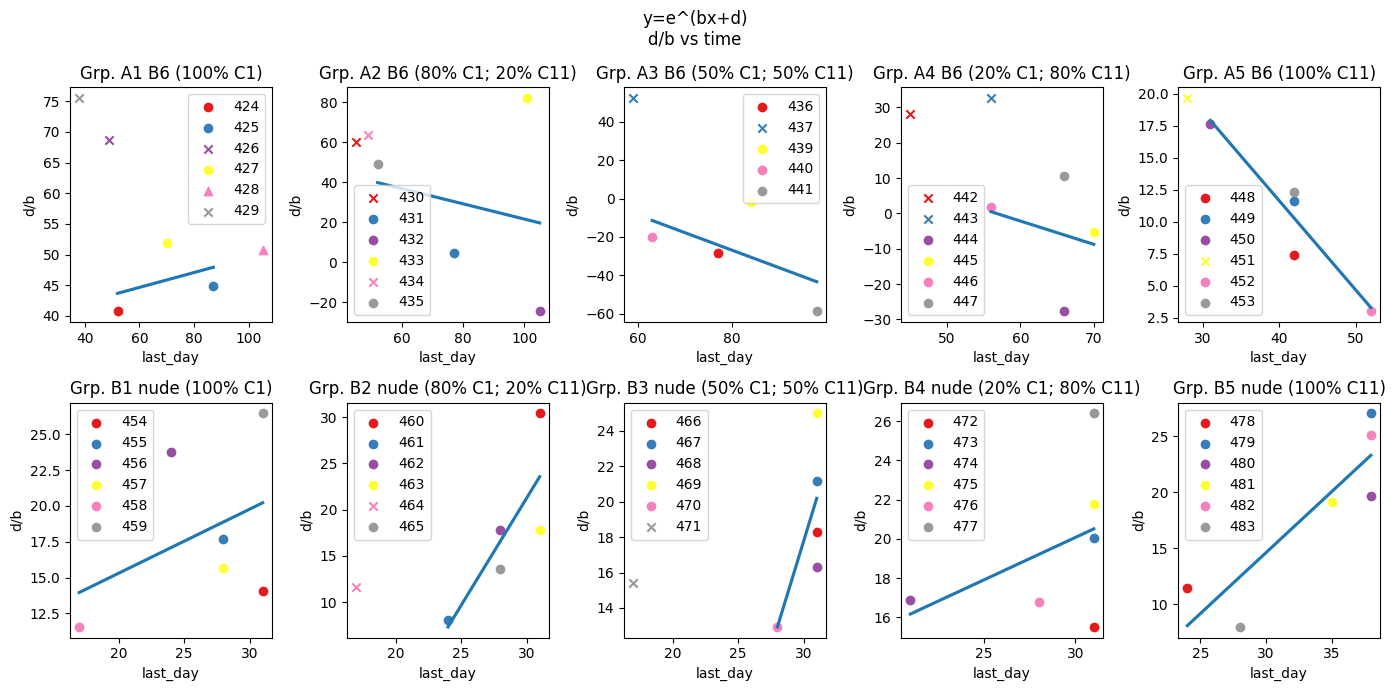

b vs size


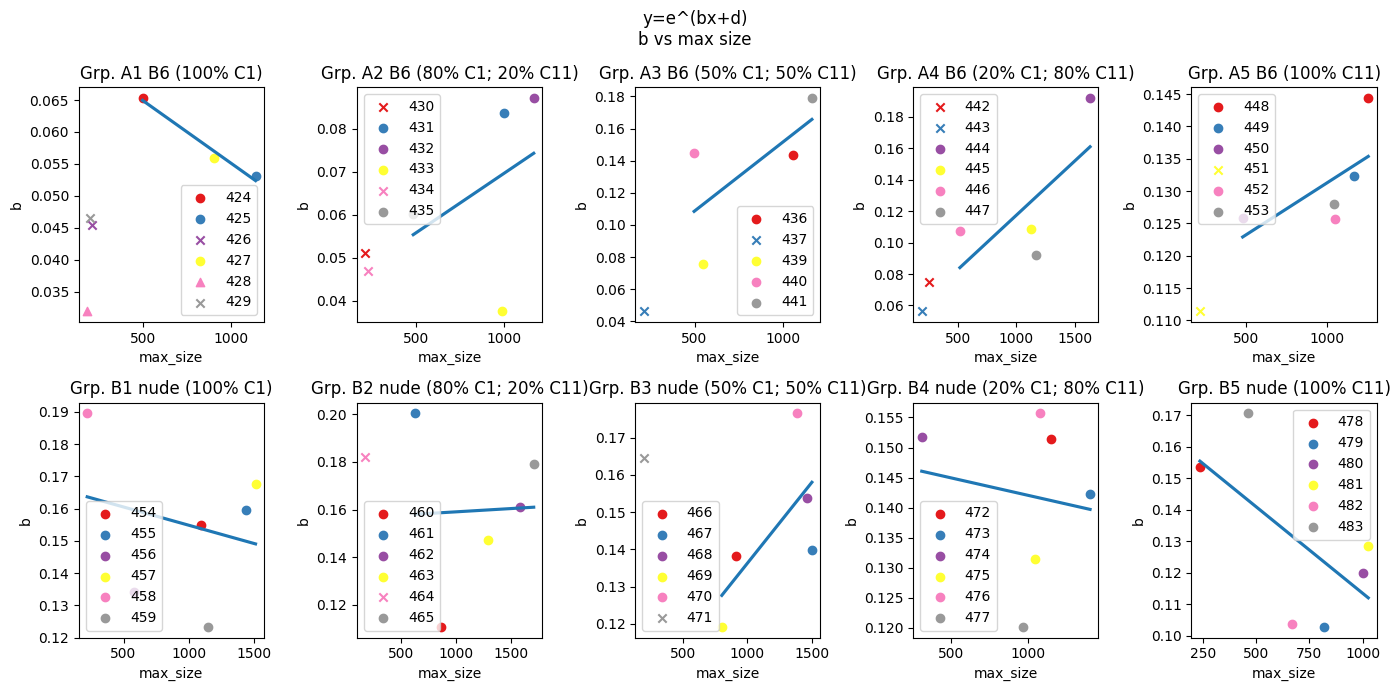

d/b vs size


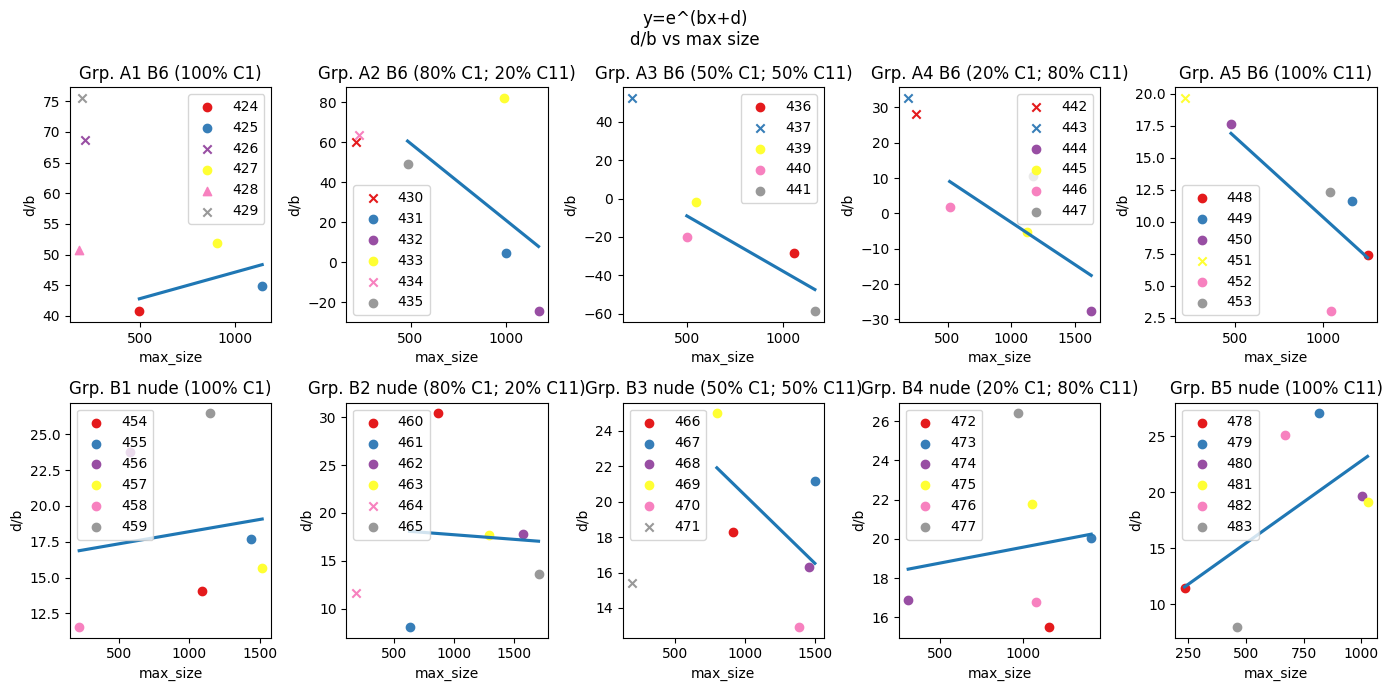

In [37]:

# Create one figure for each parameter combination with all the experiments as subplots

# d/b vs b
print("d/b vs b")
fig, axes = plt.subplots(2, 5, figsize=((14,7)))
fig.suptitle("y=e^(bx+d)\nd/b vs b")
i = j = 0
for exp in exp_df["group"].unique():
    curr_data = exp_df[exp_df["group"] == exp].reset_index()
    curr_reg_data = curr_data[(~curr_data["ID"].isin(early_harvest_id)) & (~curr_data["ID"].isin(slow_growth_id))]
    for k in range(len(curr_data)):
        axes[i][j].scatter(x=curr_data.loc[k, "b"], y=curr_data.loc[k,"d/b"], color=id_colors[curr_data.loc[k, "ID"]],
                           label=curr_data.loc[k,"id"], marker=curr_data.loc[k,"marker"])
    sns.regplot(data=curr_reg_data, x="b", y="d/b", scatter=False, ax=axes[i][j], ci=None)
    axes[i][j].legend()
    axes[i][j].set_title(exp)
    j += 1
    if j >= 5: 
        j = 0
        i += 1
plt.tight_layout()
if save:
    plt.savefig(save_path+"b_vs_d.png")
plt.show()

# b vs time
print("b vs time")
fig, axes = plt.subplots(2, 5, figsize=((14,7)))
fig.suptitle("y=e^(bx+d)\nb vs time")
i = j = 0
for exp in exp_df["group"].unique():
    curr_data = exp_df[exp_df["group"] == exp].reset_index()
    curr_reg_data = curr_data[(~curr_data["ID"].isin(early_harvest_id)) & (~curr_data["ID"].isin(slow_growth_id))]
    for k in range(len(curr_data)):
        axes[i][j].scatter(x=curr_data.loc[k, "last_day"], y=curr_data.loc[k,"b"], color=id_colors[curr_data.loc[k, "ID"]],
                           label=curr_data.loc[k,"id"], marker=curr_data.loc[k,"marker"])
    sns.regplot(data=curr_reg_data, x="last_day", y="b", scatter=False, ax=axes[i][j], ci=None)
    axes[i][j].legend()
    axes[i][j].set_title(exp)
    j += 1
    if j >= 5: 
        j = 0
        i += 1
plt.tight_layout()
if save:
    plt.savefig(save_path+"b_vs_time.png")
plt.show()

# d/b vs time
print("d/b vs time")
fig, axes = plt.subplots(2, 5, figsize=((14,7)))
fig.suptitle("y=e^(bx+d)\nd/b vs time")
i = j = 0
for exp in exp_df["group"].unique():
    curr_data = exp_df[exp_df["group"] == exp].reset_index()
    curr_reg_data = curr_data[(~curr_data["ID"].isin(early_harvest_id)) & (~curr_data["ID"].isin(slow_growth_id))]
    for k in range(len(curr_data)):
        axes[i][j].scatter(x=curr_data.loc[k, "last_day"], y=curr_data.loc[k,"d/b"], color=id_colors[curr_data.loc[k, "ID"]],
                           label=curr_data.loc[k,"id"], marker=curr_data.loc[k,"marker"])
    sns.regplot(data=curr_reg_data, x="last_day", y="d/b", scatter=False, ax=axes[i][j], ci=None)
    axes[i][j].legend()
    axes[i][j].set_title(exp)
    j += 1
    if j >= 5: 
        j = 0
        i += 1
plt.tight_layout()
if save:
    plt.savefig(save_path+"d_vs_time.png")
plt.show()

# b vs size
print("b vs size")
fig, axes = plt.subplots(2, 5, figsize=((14,7)))
fig.suptitle("y=e^(bx+d)\nb vs max size")
i = j = 0
for exp in exp_df["group"].unique():
    curr_data = exp_df[exp_df["group"] == exp].reset_index()
    curr_reg_data = curr_data[(~curr_data["ID"].isin(early_harvest_id)) & (~curr_data["ID"].isin(slow_growth_id))]
    for k in range(len(curr_data)):
        axes[i][j].scatter(x=curr_data.loc[k, "max_size"], y=curr_data.loc[k,"b"], color=id_colors[curr_data.loc[k, "ID"]],
                           label=curr_data.loc[k,"id"], marker=curr_data.loc[k,"marker"])
    sns.regplot(data=curr_reg_data, x="max_size", y="b", scatter=False, ax=axes[i][j], ci=None)
    axes[i][j].legend()
    axes[i][j].set_title(exp)
    j += 1
    if j >= 5: 
        j = 0
        i += 1
plt.tight_layout()
if save:
    plt.savefig(save_path+"b_vs_size.png")
plt.show()

# d/b vs size
print("d/b vs size")
fig, axes = plt.subplots(2, 5, figsize=((14,7)))
fig.suptitle("y=e^(bx+d)\nd/b vs max size")
i = j = 0
for exp in exp_df["group"].unique():
    curr_data = exp_df[exp_df["group"] == exp].reset_index()
    curr_reg_data = curr_data[(~curr_data["ID"].isin(early_harvest_id)) & (~curr_data["ID"].isin(slow_growth_id))]
    for k in range(len(curr_data)):
        axes[i][j].scatter(x=curr_data.loc[k, "max_size"], y=curr_data.loc[k,"d/b"], color=id_colors[curr_data.loc[k, "ID"]],
                           label=curr_data.loc[k,"id"], marker=curr_data.loc[k,"marker"])
    sns.regplot(data=curr_reg_data, x="max_size", y="d/b", scatter=False, ax=axes[i][j], ci=None)
    axes[i][j].legend()
    axes[i][j].set_title(exp)
    j += 1
    if j >= 5: 
        j = 0
        i += 1
plt.tight_layout()
if save:
    plt.savefig(save_path+"d_vs_size.png")
plt.show()


Plot variable values vs admixture type

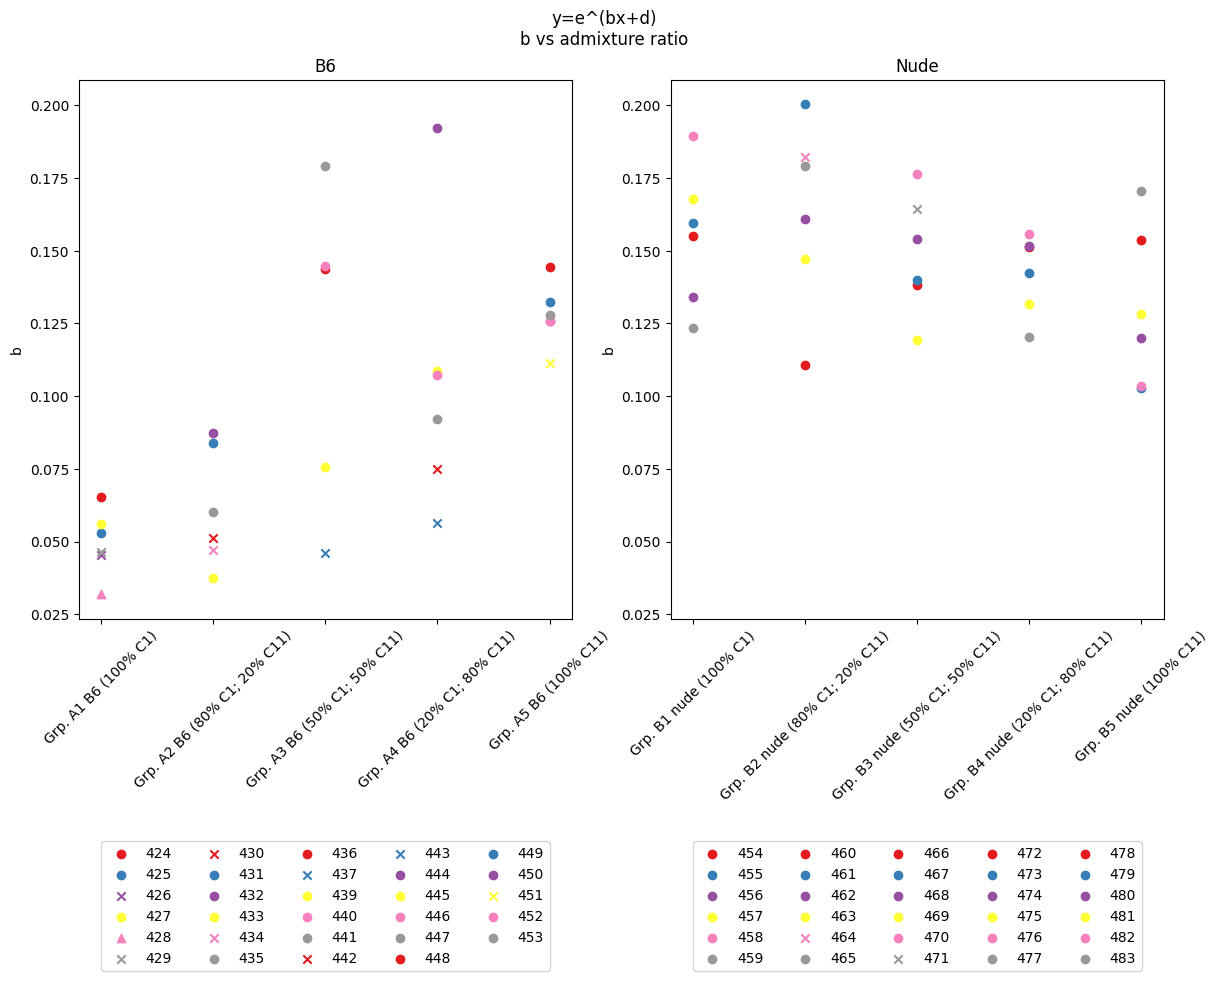

In [38]:
save=True

# b
exp_b6 = exp_df[["A" in x for x in exp_df["group"]]]
exp_nude = exp_df[["nude" in x for x in exp_df["group"]]]

fig, axes = plt.subplots(1, 2, sharey=True, figsize=((14,7)))
fig.suptitle("y=e^(bx+d)\nb vs admixture ratio")
for exp in exp_b6["group"].unique():
    legend_stuff = []
    for mouse_id in exp_b6[exp_b6["group"]==exp]["id"].unique():
        curr_data = exp_b6[(exp_b6["group"]==exp) & (exp_b6["id"]==mouse_id)].reset_index()
        x = axes[0].scatter(curr_data["group"], curr_data["b"], color=id_colors[curr_data.loc[0, "id"]],
                        marker=curr_data.loc[0,"marker"], label=curr_data.loc[0, "id"])
for exp in exp_nude["group"].unique():
    for mouse_id in exp_nude[exp_nude["group"]==exp]["id"].unique():
        curr_data = exp_nude[(exp_nude["group"]==exp) & (exp_nude["id"]==mouse_id)].reset_index()
        axes[1].scatter(curr_data["group"], curr_data["b"], color=id_colors[curr_data.loc[0, "id"]],
                        marker=curr_data.loc[0,"marker"], label=curr_data.loc[0, "id"])
axes[0].tick_params(axis='x', labelrotation=45)
axes[1].tick_params(axis='x', labelrotation=45)
axes[0].legend(loc="upper center", ncol=5, bbox_to_anchor=(0.5, -0.4))
axes[1].legend(loc="upper center", ncol=5, bbox_to_anchor=(0.5, -0.4))
axes[0].set_title("B6")
axes[1].set_title("Nude")
axes[1].tick_params(axis="y", labelleft=True)
axes[0].set_ylabel("b")
axes[1].set_ylabel("b")
# plt.tight_layout()
if save:
    plt.savefig(save_path+"b_vs_admix.png", bbox_inches="tight")
plt.show()


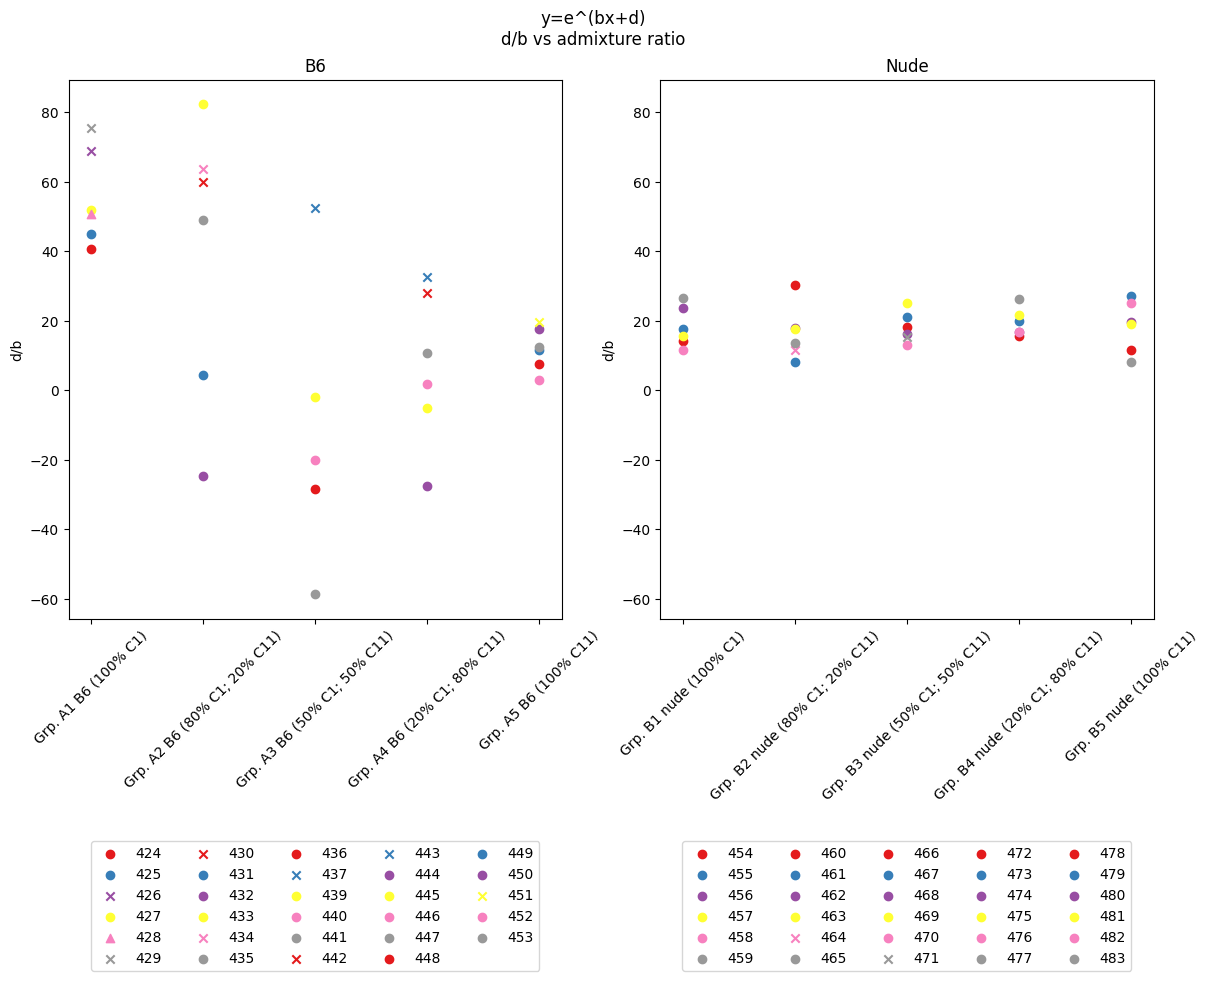

In [39]:
# d/b
exp_b6 = exp_df[["A" in x for x in exp_df["group"]]]
exp_nude = exp_df[["nude" in x for x in exp_df["group"]]]

fig, axes = plt.subplots(1, 2, sharey=True, figsize=((14,7)))
fig.suptitle("y=e^(bx+d)\nd/b vs admixture ratio")
for exp in exp_b6["group"].unique():
    legend_stuff = []
    for mouse_id in exp_b6[exp_b6["group"]==exp]["id"].unique():
        curr_data = exp_b6[(exp_b6["group"]==exp) & (exp_b6["id"]==mouse_id)].reset_index()
        x = axes[0].scatter(curr_data["group"], curr_data["d/b"], color=id_colors[curr_data.loc[0, "id"]],
                        marker=curr_data.loc[0,"marker"], label=curr_data.loc[0, "id"])
for exp in exp_nude["group"].unique():
    for mouse_id in exp_nude[exp_nude["group"]==exp]["id"].unique():
        curr_data = exp_nude[(exp_nude["group"]==exp) & (exp_nude["id"]==mouse_id)].reset_index()
        axes[1].scatter(curr_data["group"], curr_data["d/b"], color=id_colors[curr_data.loc[0, "id"]],
                        marker=curr_data.loc[0,"marker"], label=curr_data.loc[0, "id"])
axes[0].tick_params(axis='x', labelrotation=45)
axes[1].tick_params(axis='x', labelrotation=45)
axes[0].legend(loc="upper center", ncol=5, bbox_to_anchor=(0.5, -0.4))
axes[1].legend(loc="upper center", ncol=5, bbox_to_anchor=(0.5, -0.4))
axes[0].set_title("B6")
axes[1].set_title("Nude")
axes[1].tick_params(axis="y", labelleft=True)
axes[0].set_ylabel("d/b")
axes[1].set_ylabel("d/b")

if save:
    plt.savefig(save_path+"d_vs_admix.png", bbox_inches="tight")
plt.show()

Plot the estimated curves

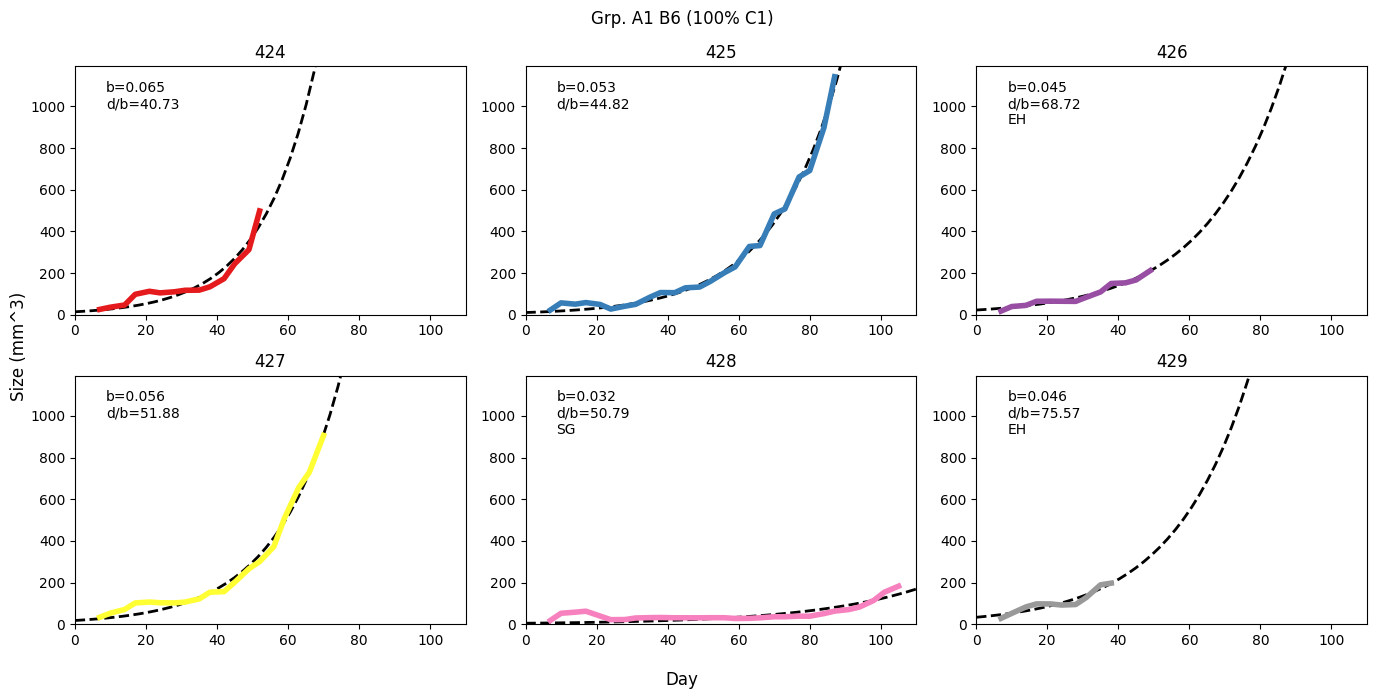

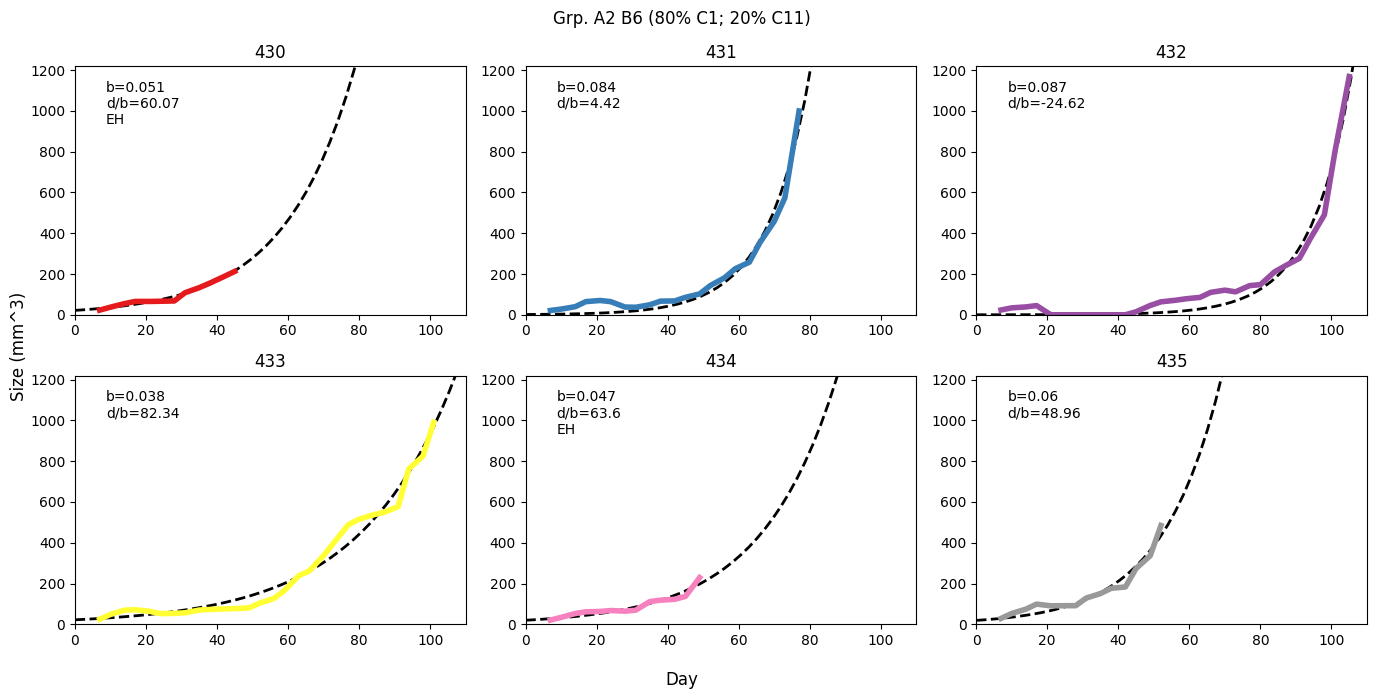

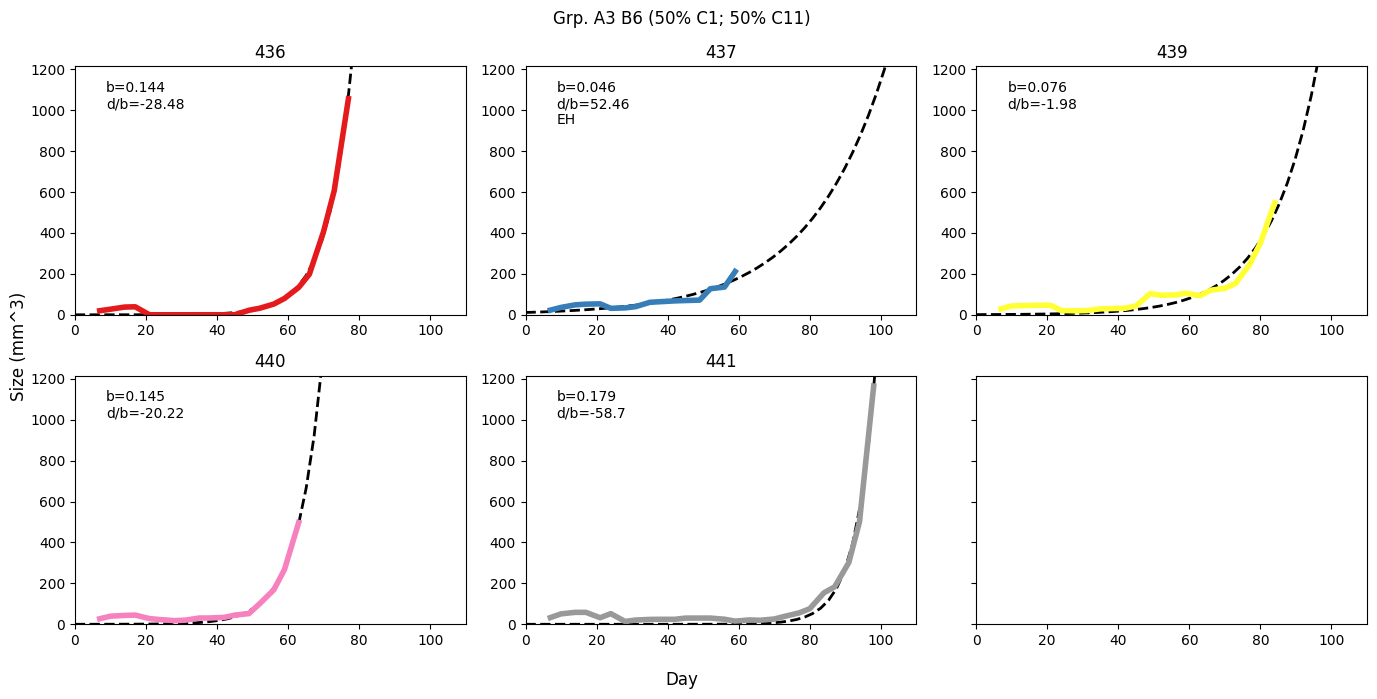

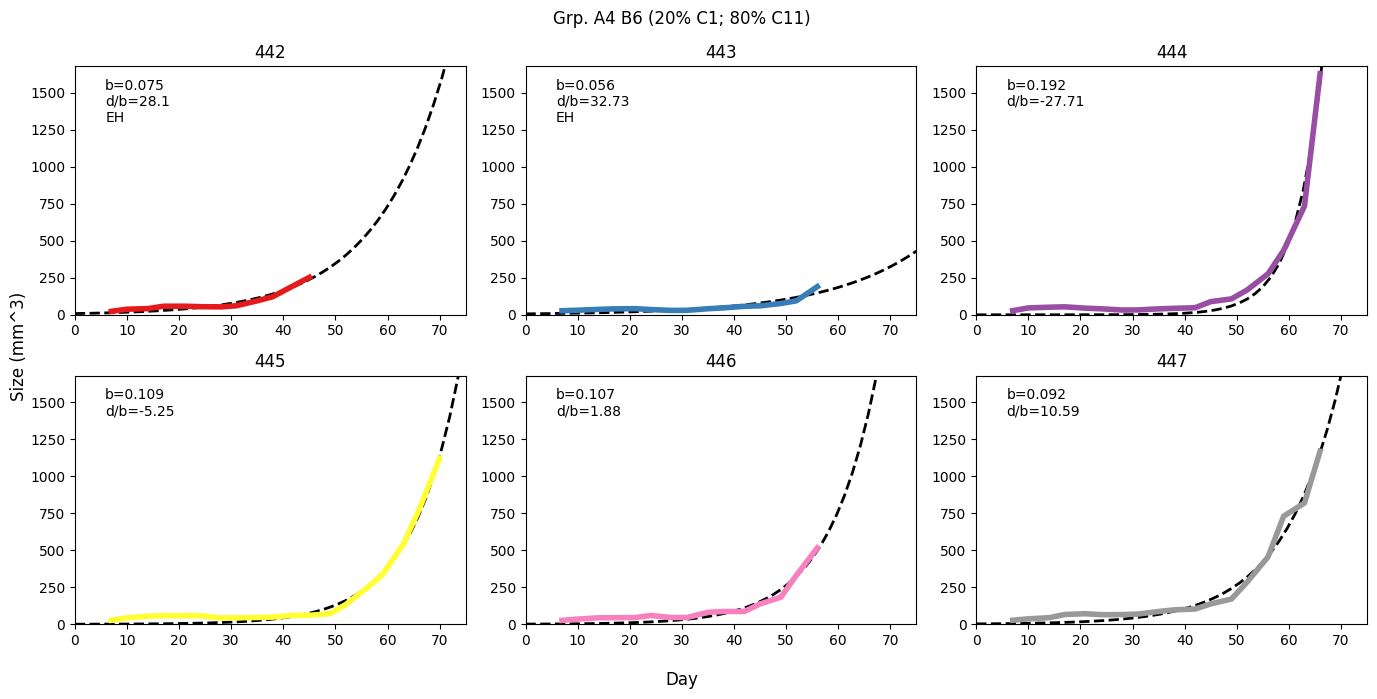

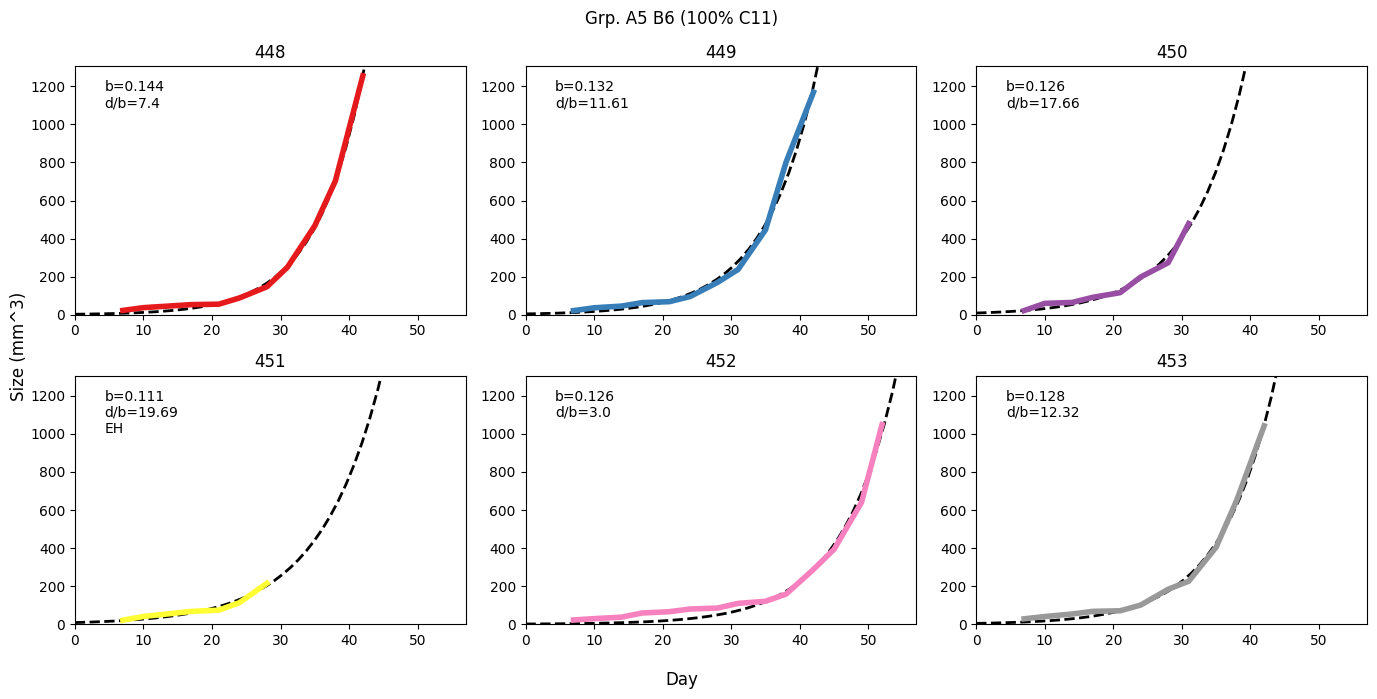

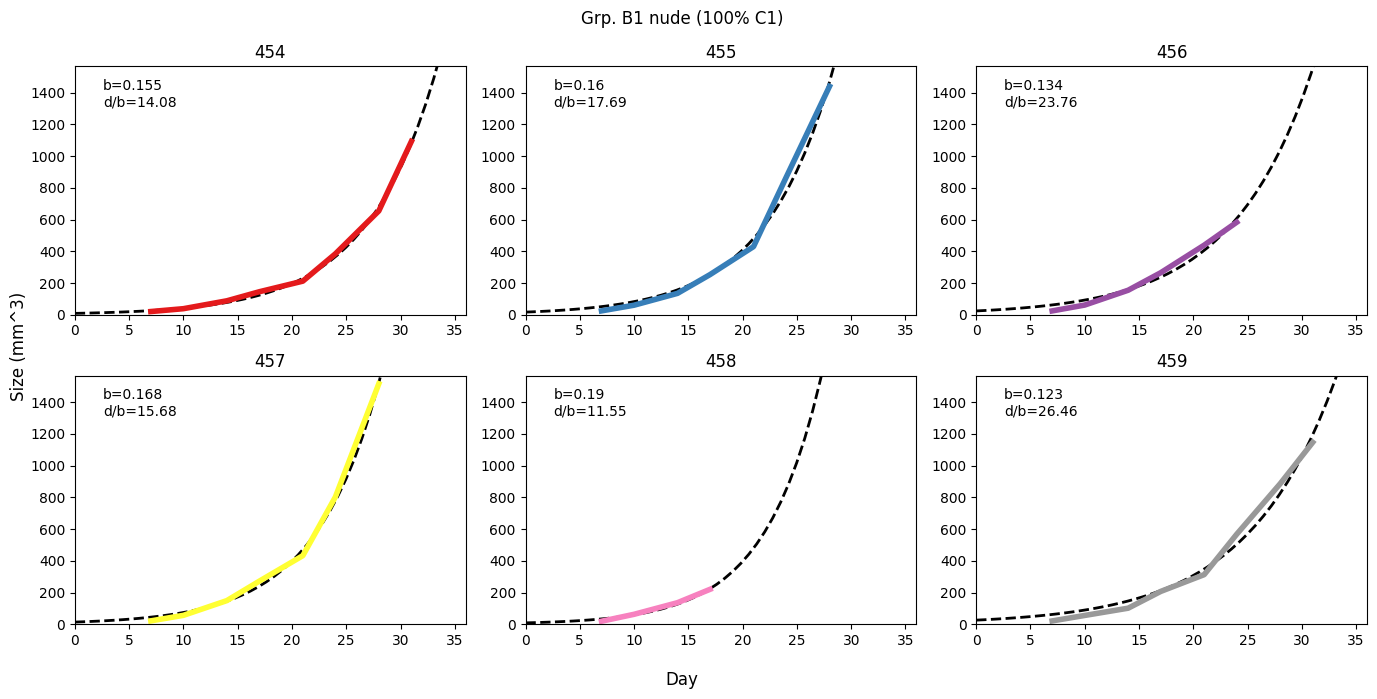

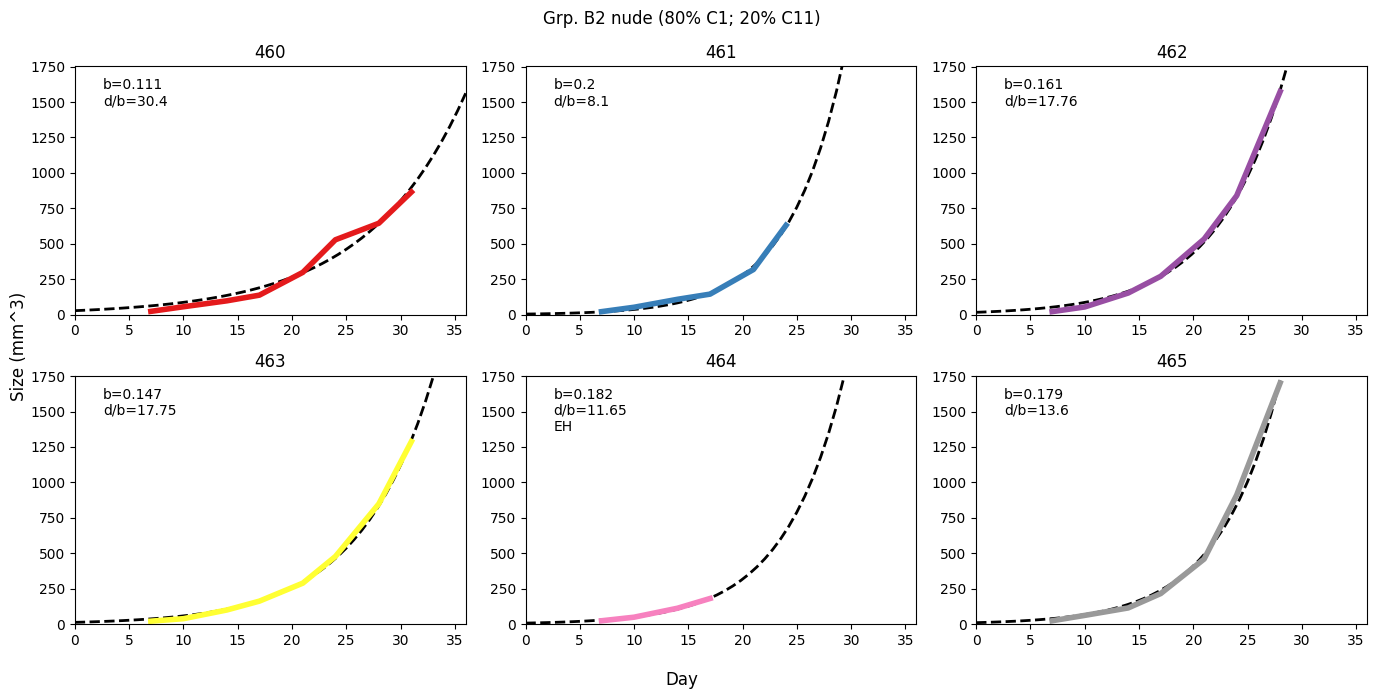

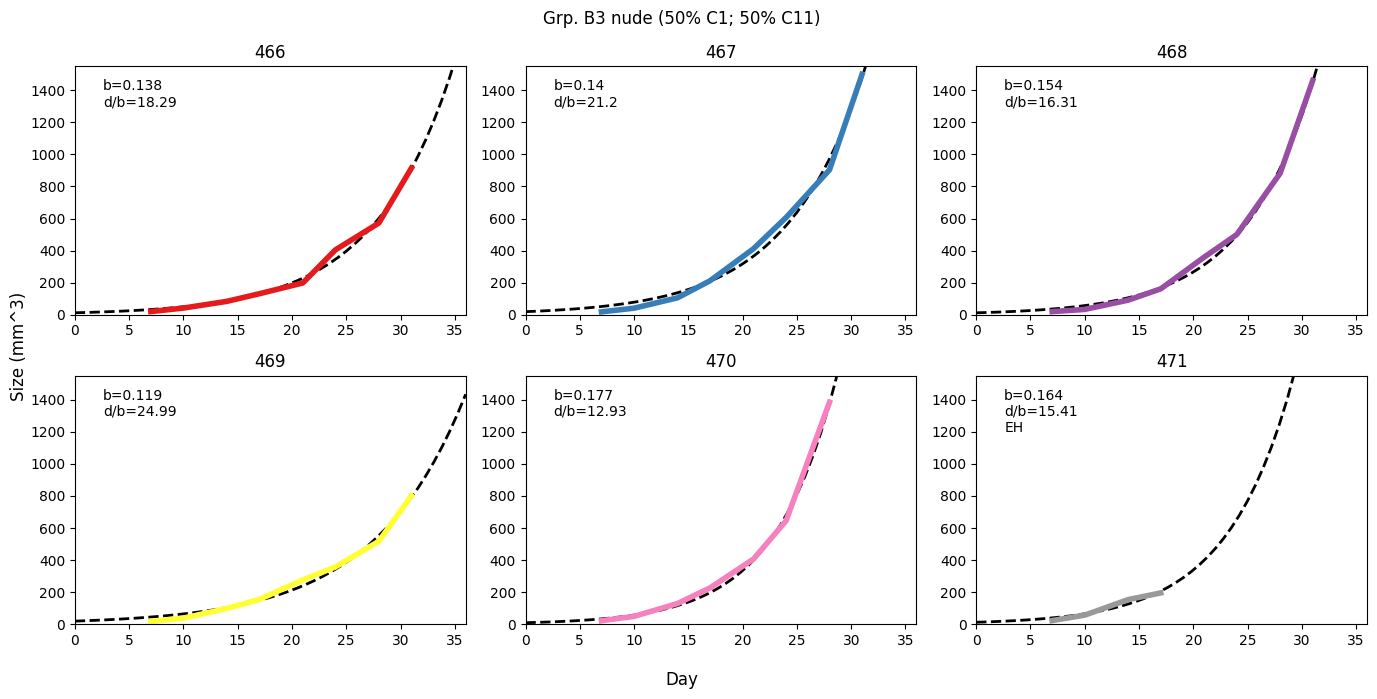

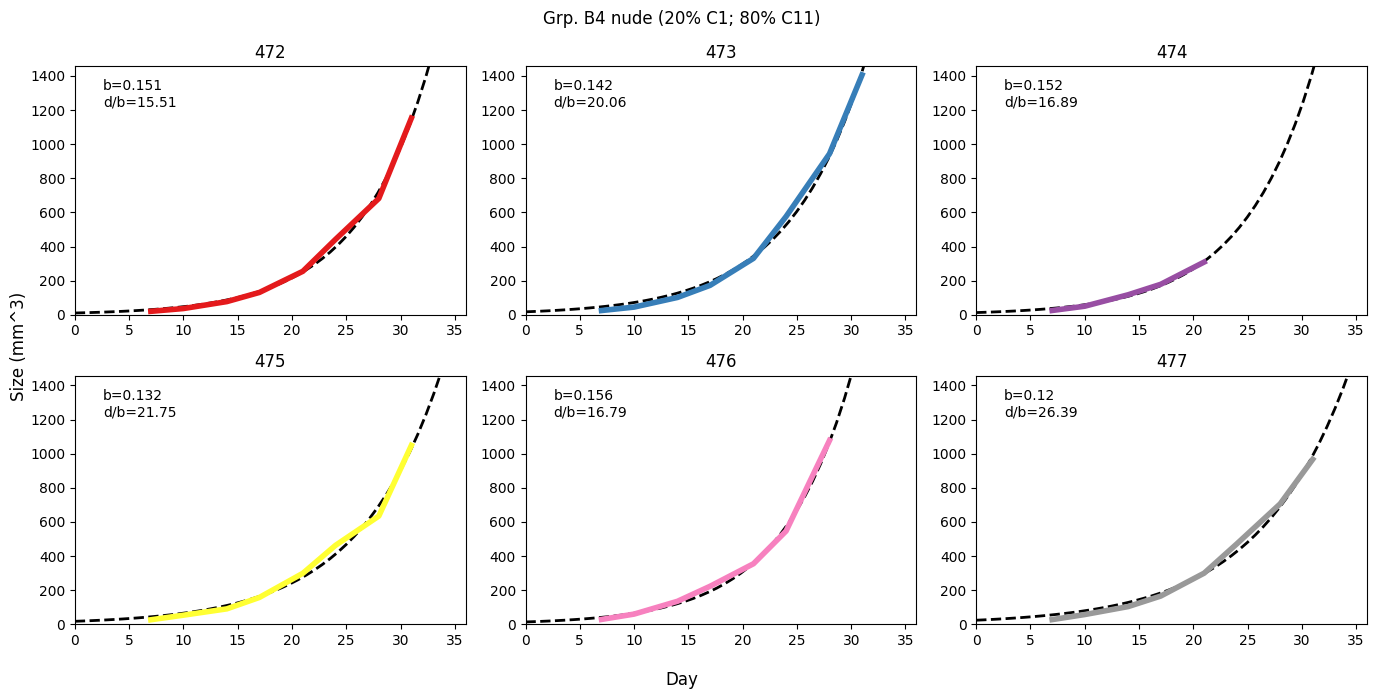

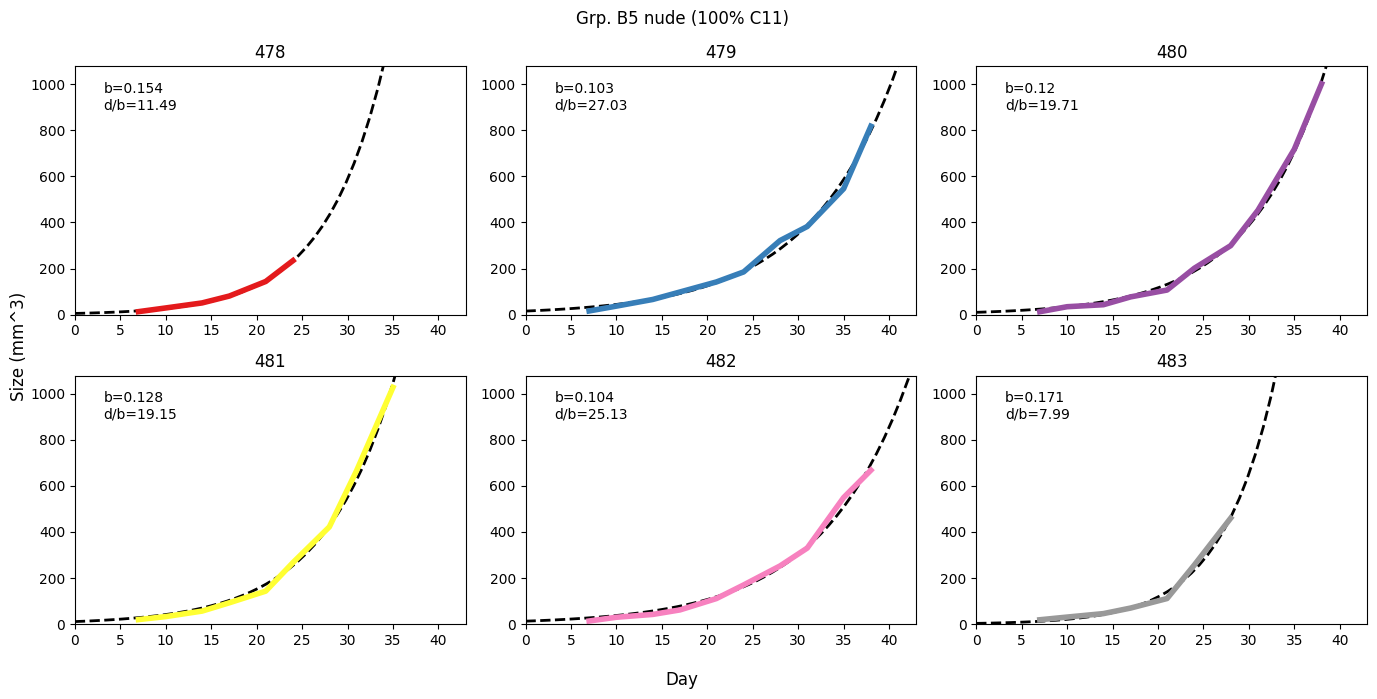

In [88]:
for exp in exp_df["group"].unique():
    fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(14,7))
    ymax = df[df["Group"] == exp]["Size"].max()
    xmax = df[df["Group"] == exp]["Day"].max()
    xs = np.linspace(0, xmax+5)

    i = j = 0
    for mouse_id in exp_df[exp_df["group"] == exp]["id"].unique():
        # Plot prediction
        pred_df = exp_df[exp_df["id"] == mouse_id].reset_index()
        pred_y = [np.exp(pred_df.loc[0,"b"]*x+pred_df.loc[0,"d"]) for x in xs]
        axes[i][j].plot(xs, pred_y, color="black", linestyle="dashed", linewidth=2) 
        if pred_df.loc[0,"marker"] == "x": marker="EH"
        elif pred_df.loc[0,"marker"] == "^": marker="SG"
        else: marker=""
        label = "b={}\nd/b={}\n{}".format(round(pred_df.loc[0,"b"],3), round(pred_df.loc[0,"d/b"],2), marker)
        axes[i][j].text(xmax/12, ymax-ymax/5, label)

        # Plot true data
        axes[i][j].plot(df[df["ID"] == mouse_id]["Day"], df[df["ID"] == mouse_id]["Size"],
                                   color=id_colors[mouse_id], linewidth=4)
        
        axes[i][j].set_title(mouse_id)
        axes[i][j].tick_params(axis="both", labelleft=True, labelbottom=True)
        axes[i][j].set_xlim([0,xmax+5])
        axes[i][j].set_ylim([0,ymax+50])
        if j == 2:
            i += 1
            j = 0
        else:
            j += 1
    fig.suptitle(exp)
    fig.supylabel("Size (mm^3)")
    fig.supxlabel("Day")
    plt.tight_layout()
    plt.savefig(save_path+"curve_pred/{}.png".format(exp))
    plt.show()
    